<a href="https://colab.research.google.com/github/blackexchange/machinelearning/blob/main/Sefaz_Empenho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.linear_model import LinearRegression
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
url ='http://www.transparencia.ba.gov.br/DadosAbertos/ObterDespesa/2022'
ddf = pandas.read_csv(url, sep=";")


NameError: ignored

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84563 entries, 0 to 84562
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Código                         84563 non-null  object 
 1   Descrição_Elemento_de_Despesa  84563 non-null  object 
 2   Empenhado                      84563 non-null  float64
 3   Liquidado                      84563 non-null  float64
 4   Pago                           84563 non-null  float64
 5   Cod_Poder                      84563 non-null  int64  
 6   Poder                          84563 non-null  object 
 7   Cod_Órgão                      84563 non-null  int64  
 8   Órgão                          84563 non-null  object 
 9   Cod_UnidadeOrçamentária        84563 non-null  int64  
 10  nom_unidade_orcamentaria       84563 non-null  object 
 11  Cod_Função                     84563 non-null  int64  
 12  Função                         84563 non-null 

In [ ]:
df = ddf[['Poder','Empenhado','Liquidado', 'Pago']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84563 entries, 0 to 84562
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Poder      84563 non-null  object 
 1   Empenhado  84563 non-null  float64
 2   Liquidado  84563 non-null  float64
 3   Pago       84563 non-null  float64
dtypes: float64(3), object(1)
memory usage: 5.2+ MB


In [ ]:
df.loc[50:100,:].groupby(by='Poder').sum()

,Empenhado,Liquidado,Pago
Poder,,,
Legislativo,1.256044e+08,81295391.6,87289581.17


In [ ]:
df.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of        Poder  Empenhado  Liquidado   Pago
0      False      False      False  False
1      False      False      False  False
2      False      False      False  False
3      False      False      False  False
4      False      False      False  False
...      ...        ...        ...    ...
84558  False      False      False  False
84559  False      False      False  False
84560  False      False      False  False
84561  False      False      False  False
84562  False      False      False  False

[84563 rows x 4 columns]>

In [ ]:
li = 10
ls = 16000
df2 = df[ (df['Empenhado'] > li) & (df['Empenhado'] <ls ) & (df['Pago'] > li) & (df['Pago'] <ls ) & (df['Liquidado'] > li) & (df['Liquidado'] <ls ) ]

In [ ]:
pandas.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
df3 = df.loc[(df["Empenhado"] > 0) & (df["Liquidado"] > 0)& (df["Pago"] > 0)].reset_index()

In [ ]:
df3.describe()

,index,Empenhado,Liquidado,Pago
count,28415.00,28415.00,28415.00,28415.00
mean,42573.04,1151478.42,1084621.85,1059101.34
std,24535.38,13350755.30,12854724.39,12736429.15
min,3.00,0.02,0.13,0.13
25%,21117.00,3708.55,3450.25,3374.12
50%,43797.00,21434.15,19440.00,18851.52
75%,61946.50,153704.69,138024.78,134856.33
max,84562.00,723563341.38,723563341.38,723563341.38


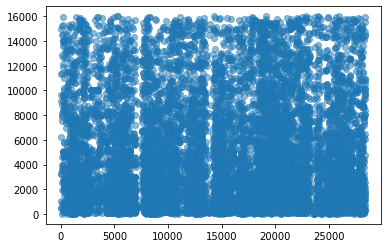

(13070,)


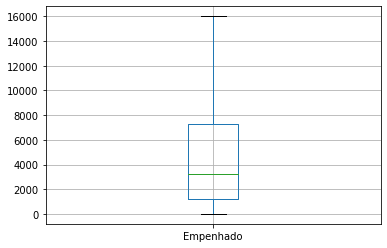

In [ ]:
li = 10
ls = 16000
x=df3.loc[(df3["Empenhado"] < ls) & (df3["Empenhado"] > li)].index
y=df3.loc[(df3["Empenhado"] < ls) & (df3["Empenhado"] > li)].Empenhado

plt.scatter(x,y ,alpha=0.5)
#plt.scatter(x=df3.index,y=df3.Liquidado /1000000,alpha=0.5)
#plt.scatter(x=df3.index,y=df3.Pago/1000000 ,alpha=0.5)

plt.show()
df3[['Empenhado']].loc[(df3["Empenhado"] < ls) & (df3["Empenhado"] > li)].boxplot()
print(y.shape)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73192011d0>,
      dtype=object)

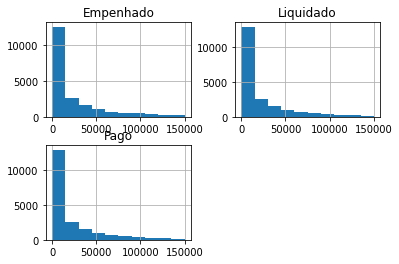

In [ ]:
df3.loc[(df3["Empenhado"] > 100) & (df3["Liquidado"] > 100)& (df3["Pago"] > 100) &(df3["Empenhado"] <150000) & (df3["Liquidado"] <150000)& (df3["Pago"] <150000)].hist()

# New Section

In [ ]:
for i in df2.columns:
    if (i != 'Poder'):
      
      print (df2[i] <0)

3        False
5        False
8        False
11       False
14       False
         ...  
84557    False
84558    False
84560    False
84561    False
84562    False
Name: Empenhado, Length: 28636, dtype: bool
3        False
5        False
8        False
11       False
14       False
         ...  
84557    False
84558    False
84560    False
84561    False
84562    False
Name: Liquidado, Length: 28636, dtype: bool
3        False
5        False
8        False
11       False
14       False
         ...  
84557    False
84558    False
84560    False
84561    False
84562    False
Name: Pago, Length: 28636, dtype: bool


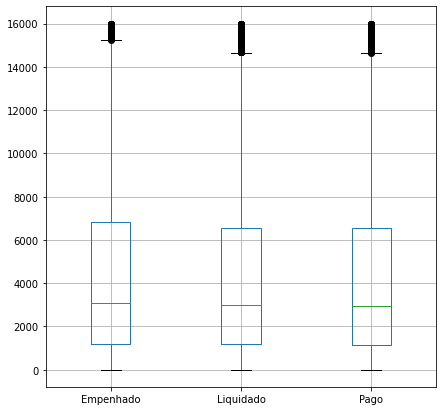

In [ ]:
df2.loc[df2.Poder=='Executivo'].boxplot(figsize=(7,7))

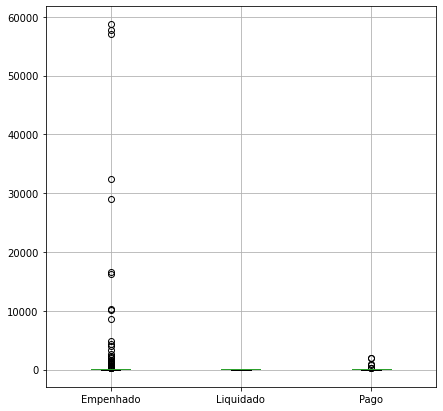

In [ ]:
#multiple conditions
 
df2[(df2['Liquidado'] >0) & (df2['Liquidado'] <100)].boxplot(figsize=(7,7))

In [ ]:
array = df2.values

In [ ]:
array.shape

(12368, 4)

In [ ]:
# Separando as dependentes Empenhado Liquidado
X = array[:,1:3]
y = array[:,3]

In [ ]:
test_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)


NameError: ignored

In [ ]:
# Fit the model on training set
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.02490178, 0.93828983])

In [ ]:
model.score(X_test,Y_test)

0.9165039855123251

In [ ]:
y_pred = model.predict(X_test)

model.predict([[483000000.84,468000000.60]])/1000

array([451147.35728633])

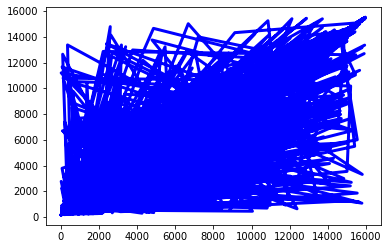

In [ ]:
#plt.scatter(X_test, Y_test, color="black")


#plt.scatter(X_test[0], Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)


#plt.xticks(())
#plt.yticks(())

plt.show()

In [ ]:
filename = 'model2.sav'
joblib.dump(model, filename)
 

['model2.sav']